## Customer Segmentation using K-Means

1. Importing libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score



2. Loading the data 

In [2]:
# Load dataset
data = pd.read_csv('customer_data.csv')



In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Feature selection

In [7]:
# Feature selection
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]



4. Standardizing 

In [8]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



5. Determining K

In [9]:
# Determine k using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



6. Using elbow method for finding k value 

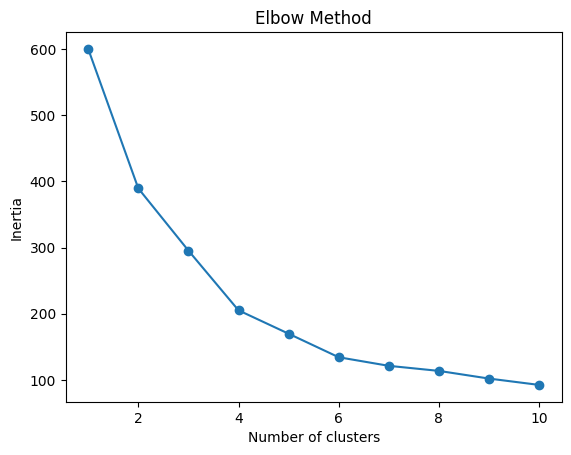

In [10]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



7. Applying k-Means

In [11]:
# Choose k=4 for example
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters



8. Finding silhouette score

In [12]:
# Silhouette score
score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.40


9. Visualize clusters clearly


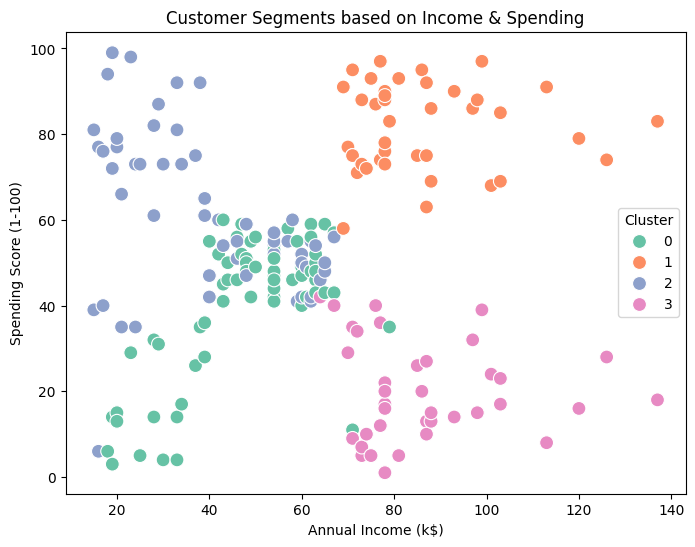

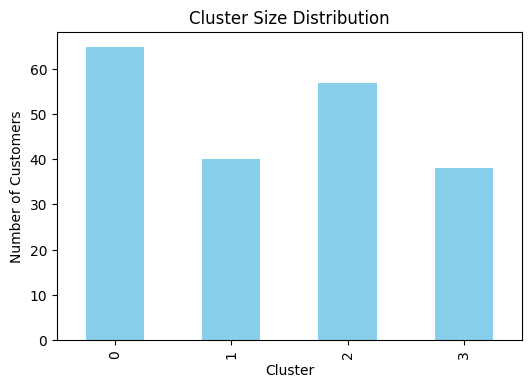

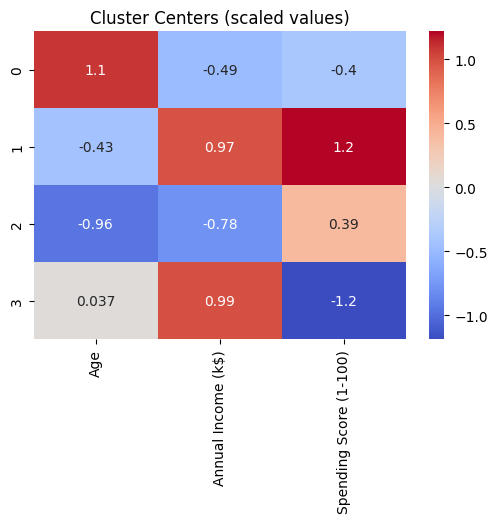

In [14]:
import seaborn as sns

# Scatterplot: Annual Income vs Spending Score with cluster colors
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments based on Income & Spending')
plt.show()

# Bar chart: Cluster sizes
plt.figure(figsize=(6,4))
data['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Size Distribution')
plt.show()

# Heatmap of cluster centers (scaled values)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
plt.figure(figsize=(6,4))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm', cbar=True)
plt.title('Cluster Centers (scaled values)')
plt.show()


10. summarize key characteristics of each segments

In [15]:
# Reverse scale cluster centers for easy interpretation
cluster_centers_orig = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers_orig, columns=features)
cluster_summary['Count'] = data['Cluster'].value_counts().sort_index().values

print("\n=== Cluster Summary ===")
print(cluster_summary.round(2))



=== Cluster Summary ===
     Age  Annual Income (k$)  Spending Score (1-100)  Count
0  53.98               47.71                   39.97     65
1  32.88               86.10                   81.53     40
2  25.44               40.00                   60.30     57
3  39.37               86.50                   19.58     38


### Business Implications & Next Steps 

- 📌 Cluster 0: Young, low-income, high-spenders → Target with loyalty programs, upsell.
- 📌 Cluster 1: Middle-aged, high-income, low-spenders → Opportunity for premium offers, personalized marketing.
- 📌 Cluster 2: Mid-age, mid-income, moderate spending → Engage with tailored discounts to increase spending.
- 📌 Cluster 3: Young, low-income, low-spenders → Low priority, but can test entry-level offers.

➡️ Next Steps:

- ✅ Design marketing strategies specific to each cluster.
- ✅ Track performance of campaigns by cluster.
- ✅ Collect additional data (online behavior, purchase history) for deeper segmentation.



### Suggested KPIs per Segment 
- 🎯 Customer Lifetime Value (CLV)
- 🛒 Average basket size
- 💸 Conversion rate (from campaigns/offers)
- ⏱ Customer retention/churn rate
- 📈 Segment-specific revenue growth
- ⭐ Customer satisfaction score (NPS/CSAT)

